In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv('data\orders.csv', sep=';')
df.head()

,order_id,origin_port,3pl,customs_procedures,logistic_hub,customer,product_id,units,late_order
0,366c7a3d298f,Rotterdam,v_002,DTP,Venlo,Marseille,1692723,583,True
1,45f906331e10,Rotterdam,v_004,CRF,Rome,Marseille,1644308,459,False
2,ac84a6e4af0f,Athens,v_002,CRF,Venlo,Paris,1684170,464,True
3,f5e98cb29790,Rotterdam,v_004,CRF,Lille,Milan,1620510,678,False
4,a9e7c9bee35b,Barcelona,v_002,CRF,Venlo,Berlin,1699372,353,False


In [51]:
pl_3_types = df['3pl'].unique()
pl_3_types.sort()
lateness_pl = []
for pl in pl_3_types:
    late_orders = len(df[(df['3pl'] == pl) & (df['late_order'] == True)])
    total_orders = len(df[df['3pl'] == pl])
    lateness_pl.append([pl, late_orders / total_orders, total_orders])
print(lateness_pl)

[['v_001', 0.38209853328318916, 7977], ['v_002', 0.1994466388772594, 54937], ['v_003', 0.2502524159815376, 6933], ['v_004', 0.2569492898782327, 44429]]


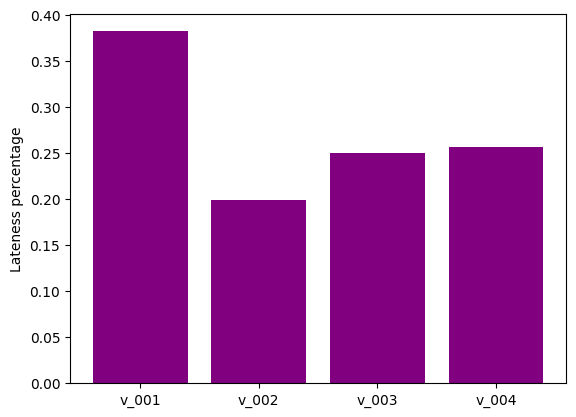

In [54]:
#generate plot of the lateness of each 3pl
plt.bar([x[0] for x in lateness_pl], [x[1] for x in lateness_pl])
plt.ylabel('Lateness percentage')
#color purple
plt.bar([x[0] for x in lateness_pl], [x[1] for x in lateness_pl], color='purple')
plt.show()

In [33]:
last_True = 1
last_True_distr = [0 for x in range(200)]
for i, row in df.iterrows():
    if row['origin_port'] == 'Athens':
        if row['late_order'] == True:
            last_True_distr[last_True] += 1
            last_True = 0
        last_True += 1

In [34]:
# count all the True values of late_order
late_orders = len(df[df['late_order'] == True])
late_order_prob = late_orders/len(df)

In [35]:
#generate plot of the geometric distribution with late_order_prob
geom_dist = [((1-late_order_prob)**(k-1))*late_order_prob for k in range(1,21)]

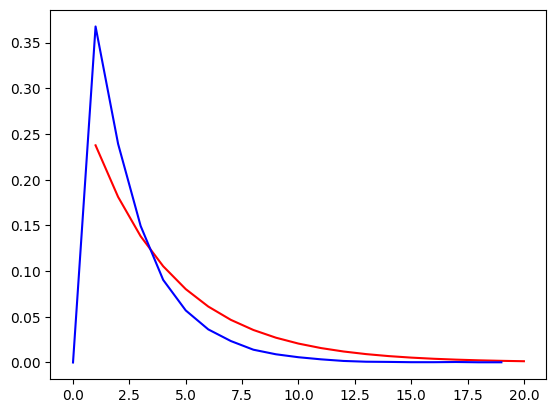

In [36]:
last_True_distri = [x/sum(last_True_distr) for x in last_True_distr]

#plot last_True_distr with geom_dist
plt.plot(range(1,21), geom_dist, color='red')
plt.plot(range(20), last_True_distri[:20], color='blue')
plt.show()